# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [3]:
print(cities)

['bluff', 'aloleng', 'klaksvik', 'louisbourg', 'ushuaia', 'cidreira', 'severo-kurilsk', 'belmonte', 'mataura', 'kahului', 'robertsport', 'berbera', 'punta arenas', 'hambantota', 'taolanaro', 'longyearbyen', 'yerbogachen', 'beringovskiy', 'dongsheng', 'hobart', 'rungata', 'rikitea', 'tasiilaq', 'armacao dos buzios', 'port hardy', 'kaitangata', 'haines junction', 'cape town', 'palauig', 'bredasdorp', 'aswan', 'saint george', 'sechura', 'port elizabeth', 'carnarvon', 'new norfolk', 'atuona', 'chokurdakh', 'hithadhoo', 'abbeville', 'arraial do cabo', 'vestmannaeyjar', 'hajnowka', 'tuatapere', 'lagoa', 'bababe', 'oranjestad', 'sao filipe', 'tuktoyaktuk', 'nara', 'airai', 'puerto ayora', 'tautira', 'alice springs', 'busselton', 'amderma', 'pochutla', 'padang', 'hermanus', 'lasa', 'albany', 'torbay', 'maneadero', 'avarua', 'vaini', 'hurghada', 'panaba', 'russell', 'upernavik', 'fortuna', 'sopetran', 'saint-joseph', 'yellowknife', 'pangody', 'maryborough', 'gariaband', 'dikson', 'emporia', 'ni

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#check if weather for city in cities, create list (try .. except function)

city = [] # after weather found 

lat=[]
lng=[]
temp=[]
humid=[]
clouds=[]
wind_sp=[]
country=[]
date=[]

# url created
query_url="http://api.openweathermap.org/data/2.5/weather"

for seq,city_name in enumerate(cities): #get the number and the name of the city with weather data found  
  
    print(f"Processing city {seq} ' {city_name}")
    pars = {"appid" : weather_api_key, "q": city_name, "units" : "imperial"}
    try:
        response = requests.get(query_url, params=pars).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_sp.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city.append(city_name)
    except:
        print("Weather data not found, skipping")
        pass
    
print(len(city))



Processing city 0 ' zhovtneve
Processing city 1 ' bluff
Processing city 2 ' luderitz
Processing city 3 ' sivas
Processing city 4 ' mar del plata
Processing city 5 ' saleaula
Weather data not found, skipping
Processing city 6 ' kaka
Processing city 7 ' arraial do cabo
Processing city 8 ' lakinsk
Processing city 9 ' punta arenas
Processing city 10 ' rikitea
Processing city 11 ' airai
Processing city 12 ' almaznyy
Processing city 13 ' dikson
Processing city 14 ' albany
Processing city 15 ' victoria point
Processing city 16 ' hobart
Processing city 17 ' kodiak
Processing city 18 ' nikolskoye
Processing city 19 ' atuona
Processing city 20 ' lolua
Weather data not found, skipping
Processing city 21 ' ormara
Processing city 22 ' barranca
Processing city 23 ' kisanga
Processing city 24 ' grand-santi
Processing city 25 ' kapit
Processing city 26 ' cidreira
Processing city 27 ' dingle
Processing city 28 ' verkhnyachka
Processing city 29 ' busselton
Processing city 30 ' unity
Processing city 31 '

Processing city 251 ' egvekinot
Processing city 252 ' olafsvik
Processing city 253 ' urdzhar
Weather data not found, skipping
Processing city 254 ' bargal
Weather data not found, skipping
Processing city 255 ' maniitsoq
Processing city 256 ' thinadhoo
Processing city 257 ' dukat
Processing city 258 ' bengkulu
Processing city 259 ' narsaq
Processing city 260 ' kirakira
Processing city 261 ' dunkirk
Processing city 262 ' saint-joseph
Processing city 263 ' clyde river
Processing city 264 ' provideniya
Processing city 265 ' montefiascone
Processing city 266 ' erenhot
Processing city 267 ' dalvik
Processing city 268 ' warqla
Weather data not found, skipping
Processing city 269 ' ponta do sol
Processing city 270 ' chiang klang
Processing city 271 ' flinders
Processing city 272 ' ilulissat
Processing city 273 ' porto novo
Processing city 274 ' port hardy
Processing city 275 ' sao joao da barra
Processing city 276 ' arlit
Processing city 277 ' khor
Processing city 278 ' rawson
Processing city 

Processing city 495 ' parainen
Processing city 496 ' namli
Processing city 497 ' navahrudak
Processing city 498 ' college
Processing city 499 ' consett
Processing city 500 ' ibiruba
Processing city 501 ' grand river south east
Weather data not found, skipping
Processing city 502 ' kaseda
Processing city 503 ' garmsar
Processing city 504 ' tucuman
Processing city 505 ' cazaje
Weather data not found, skipping
Processing city 506 ' eureka
Processing city 507 ' nemuro
Processing city 508 ' dauphin
Processing city 509 ' conceicao do araguaia
Processing city 510 ' pochutla
Processing city 511 ' altay
Processing city 512 ' baykit
Processing city 513 ' mocuba
Processing city 514 ' falealupo
Weather data not found, skipping
Processing city 515 ' fort-shevchenko
Processing city 516 ' barraute
Processing city 517 ' kawalu
Processing city 518 ' port-gentil
Processing city 519 ' sulangan
Processing city 520 ' dauriya
Processing city 521 ' cururupu
Processing city 522 ' mana
Processing city 523 ' le

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# created a data frame from a dictionary (from cities in city list, lat, lng, temp,humid, clouds, wind_sp, country, date) 
weather_dict = {
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp" : temp,
    "Humidity": humid,
    "Cloudiness" : clouds,
    "Wind Speed" : wind_sp,
    "Country" : country,
    "Date":  date  
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head(15)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhovtneve,50.6637,24.2492,67.03,69,9,5.55,UA,1626040070
1,bluff,-46.6000,168.3333,43.84,83,100,15.41,NZ,1626040070
2,luderitz,-26.6481,15.1594,54.45,83,12,4.99,NA,1626040071
3,sivas,39.7916,37.0019,59.63,94,0,3.44,TR,1626040071
4,mar del plata,-38.0023,-57.5575,55.87,57,0,10.00,AR,1626039887
5,kaka,37.3482,59.6143,82.49,29,5,0.45,TM,1626040071
6,arraial do cabo,-22.9661,-42.0278,69.66,83,0,5.75,BR,1626039864
7,lakinsk,56.0193,39.9485,61.43,72,0,5.68,RU,1626039973
8,punta arenas,-53.1500,-70.9167,35.71,80,20,36.82,CL,1626040071
9,rikitea,-23.1203,-134.9692,73.71,82,48,21.72,PF,1626040072


In [10]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,22.279958,23.536850,68.909430,72.016750,54.931323,7.393367,1.626040e+09
std,33.114473,88.775642,14.624472,20.850291,38.066089,5.522671,6.605465e+01
min,-54.800000,-179.166700,33.460000,7.000000,0.000000,0.000000,1.626040e+09
25%,-4.750000,-54.383300,58.230000,62.000000,19.000000,3.360000,1.626040e+09
50%,28.766700,31.895800,70.090000,77.000000,62.000000,5.990000,1.626040e+09
75%,50.663700,97.611100,79.340000,88.000000,95.000000,9.890000,1.626040e+09
max,78.218600,179.316700,113.470000,100.000000,100.000000,36.820000,1.626040e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,22.279958,23.536850,68.909430,72.016750,54.931323,7.393367,1.626040e+09
std,33.114473,88.775642,14.624472,20.850291,38.066089,5.522671,6.605465e+01
min,-54.800000,-179.166700,33.460000,7.000000,0.000000,0.000000,1.626040e+09
25%,-4.750000,-54.383300,58.230000,62.000000,19.000000,3.360000,1.626040e+09
50%,28.766700,31.895800,70.090000,77.000000,62.000000,5.990000,1.626040e+09
75%,50.663700,97.611100,79.340000,88.000000,95.000000,9.890000,1.626040e+09
max,78.218600,179.316700,113.470000,100.000000,100.000000,36.820000,1.626040e+09


In [12]:
# cities with humidity over 100%
humid_over100_df = weather_data.loc[weather_data["Humidity"]>100]
humid_over100_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.
humid_index = humid_over100_df.set_index(["Humidity"])
humid_index

,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Country,Date
Humidity,,,,,,,,


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(index = humid_over100_df["Humidity"], inplace= False)
clean_city_data


# simplier way to get the same data
#clean_city_data = weather_data.loc[weather_data["Humidity"]<=100]


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhovtneve,50.6637,24.2492,67.03,69,9,5.55,UA,1626040070
1,bluff,-46.6000,168.3333,43.84,83,100,15.41,NZ,1626040070
2,luderitz,-26.6481,15.1594,54.45,83,12,4.99,NA,1626040071
3,sivas,39.7916,37.0019,59.63,94,0,3.44,TR,1626040071
4,mar del plata,-38.0023,-57.5575,55.87,57,0,10.00,AR,1626039887
...,...,...,...,...,...,...,...,...,...
592,darnah,32.7670,22.6367,77.68,73,0,14.99,LY,1626040207
593,aswan,24.0934,32.9070,91.60,23,17,8.28,EG,1626040208
594,nongan,44.3820,125.1685,75.61,88,72,8.30,CN,1626040208
595,daru,-9.0763,143.2092,78.13,90,30,14.20,PG,1626040208


In [15]:
#export to csv
clean_city_data.to_csv("weather_data.csv", index=False, header=True)

In [4]:
# load saved data from the file
clean_city_data = pd.read_csv("weather_data.csv")
clean_city_data.head()                          

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhovtneve,50.6637,24.2492,67.03,69,9,5.55,UA,1626040070
1,bluff,-46.6000,168.3333,43.84,83,100,15.41,NZ,1626040070
2,luderitz,-26.6481,15.1594,54.45,83,12,4.99,NaN,1626040071
3,sivas,39.7916,37.0019,59.63,94,0,3.44,TR,1626040071
4,mar del plata,-38.0023,-57.5575,55.87,57,0,10.00,AR,1626039887


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# get the date for a date in title from DataFrame
from datetime import datetime
ts = int(clean_city_data["Date"][0])

data_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')
data_date

'07/11/2021'

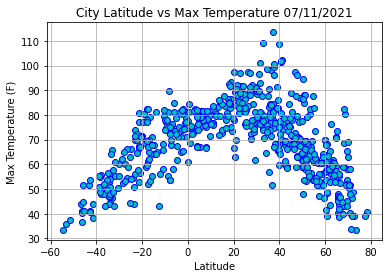

In [22]:
#plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp"], marker="o",c="c",edgecolors="b")
plt.title("City Latitude vs Max Temperature " + data_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLat_vs_Temp.png")


# Show plot
plt.show()



## Latitude vs. Humidity Plot

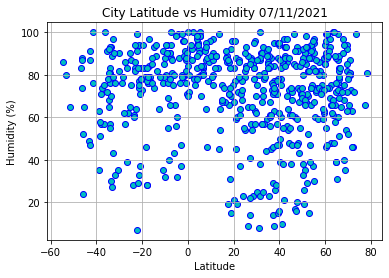

In [23]:
#plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker="o",c="c",edgecolors="b")
plt.title("City Latitude vs Humidity " + data_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLat_vs_Humidity.png")


# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

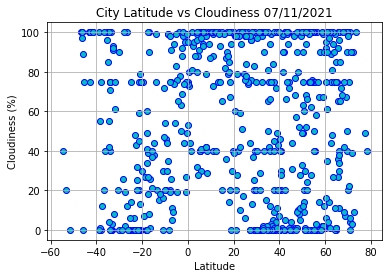

In [21]:
#plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker="o",c="c",edgecolors="b")
plt.title("City Latitude vs Cloudiness " + data_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLat_vs_Cloudiness.png")


# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

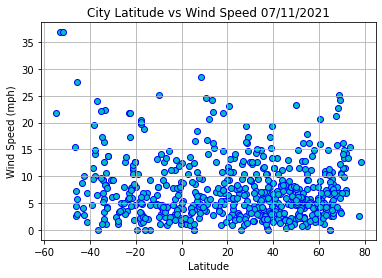

In [80]:
#plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker="o",c="c",edgecolors="b")
plt.title("City Latitude vs Wind Speed " + data_date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLat_vs_Wind_Speed.png")


# Show plot
plt.show()

## Linear Regression

In [25]:
#dataFrame used for separation to Northern and Southern Hemisphere, per Latitude  
clean_city_data.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhovtneve,50.6637,24.2492,67.03,69,9,5.55,UA,1626040070
1,bluff,-46.6000,168.3333,43.84,83,100,15.41,NZ,1626040070
2,luderitz,-26.6481,15.1594,54.45,83,12,4.99,NaN,1626040071
3,sivas,39.7916,37.0019,59.63,94,0,3.44,TR,1626040071
4,mar del plata,-38.0023,-57.5575,55.87,57,0,10.00,AR,1626039887


In [26]:
#dataframe for cities located on Northern Hemisphere
northern_hem = clean_city_data.loc[clean_city_data["Latitude"]>=0]
northern_hem

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhovtneve,50.6637,24.2492,67.03,69,9,5.55,UA,1626040070
3,sivas,39.7916,37.0019,59.63,94,0,3.44,TR,1626040071
5,kaka,37.3482,59.6143,82.49,29,5,0.45,TM,1626040071
7,lakinsk,56.0193,39.9485,61.43,72,0,5.68,RU,1626039973
11,almaznyy,48.0448,40.0450,68.14,74,10,7.45,RU,1626040072
...,...,...,...,...,...,...,...,...,...
591,novopokrovka,49.8425,36.5477,77.38,86,49,5.50,UA,1626040207
592,darnah,32.7670,22.6367,77.68,73,0,14.99,LY,1626040207
593,aswan,24.0934,32.9070,91.60,23,17,8.28,EG,1626040208
594,nongan,44.3820,125.1685,75.61,88,72,8.30,CN,1626040208


In [27]:
#dataframe for sities loated on Southern Hemisphere
southern_hem = clean_city_data.loc[clean_city_data["Latitude"]<0]
southern_hem

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bluff,-46.6000,168.3333,43.84,83,100,15.41,NZ,1626040070
2,luderitz,-26.6481,15.1594,54.45,83,12,4.99,NaN,1626040071
4,mar del plata,-38.0023,-57.5575,55.87,57,0,10.00,AR,1626039887
6,arraial do cabo,-22.9661,-42.0278,69.66,83,0,5.75,BR,1626039864
8,punta arenas,-53.1500,-70.9167,35.71,80,20,36.82,CL,1626040071
...,...,...,...,...,...,...,...,...,...
583,nelson bay,-32.7167,152.1500,48.96,79,92,4.14,AU,1626040205
585,okahandja,-21.9833,16.9167,57.51,29,0,7.40,NaN,1626040206
586,lundazi,-12.2929,33.1782,56.17,79,18,5.82,ZM,1626040206
590,neuquen,-38.9516,-68.0591,55.29,35,0,4.61,AR,1626040207


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
#plot: setting x_values, y_values 
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Max Temp"]



In [33]:
# Performed a linear regression on Max Temperature vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      66.401395
3      71.417564
5      72.544900
7      63.930429
11     67.609703
         ...    
591    66.780281
592    74.658574
593    78.660399
594    69.299646
596    66.030907
Name: Latitude, Length: 426, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.46x +89.78


The r-value is: 0.3978356707200989


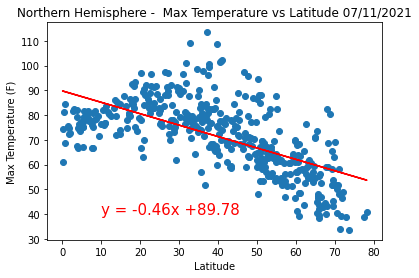

In [37]:
# Create Plot
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere -  Max Temperature vs Latitude " + data_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/North_Max_Temp_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
#plot: setting x_values, y_values 
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Max Temp"]


In [39]:
# Performed a linear regression on Max Temperature vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      43.562597
2      58.589925
4      50.038194
6      61.363126
8      38.629283
         ...    
583    54.019191
585    62.103349
586    69.401943
590    49.323202
595    71.824615
Name: Latitude, Length: 171, dtype: float64


In [40]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.75x +78.66


The r-value is: 0.6272090854853345


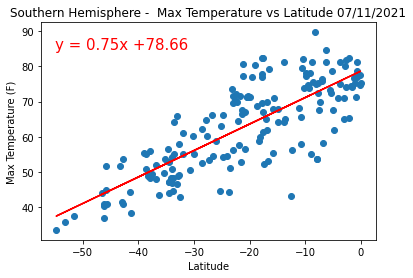

In [42]:
# Create Plot
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere -  Max Temperature vs Latitude " + data_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/South_Max_Temp_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [43]:
#plot: setting x_values, y_values 
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Humidity"]


In [44]:
# Performed a linear regression on Humidity vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      70.496295
3      71.467199
5      71.685401
7      70.018028
11     70.730169
         ...    
591    70.569631
592    72.094512
593    72.869085
594    71.057266
596    70.424586
Name: Latitude, Length: 426, dtype: float64


In [45]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.09x +75.02


The r-value is: 0.006920465879693447


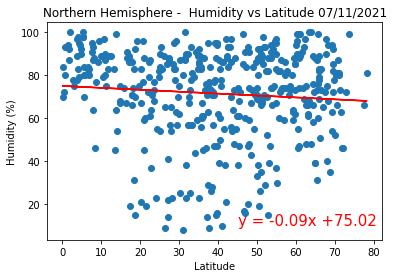

In [48]:
# Create Plot
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere -  Humidity vs Latitude " + data_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/North_Humidity_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
#plot: setting x_values, y_values 
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Humidity"]


In [50]:
# Performed a linear regression on Humidity vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      67.297210
2      72.090821
4      69.362880
6      72.975452
8      65.723518
         ...    
583    70.632789
585    73.211578
586    75.539778
590    69.134802
595    76.312593
Name: Latitude, Length: 171, dtype: float64


In [51]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.24x +78.49


The r-value is: 0.027624415709573125


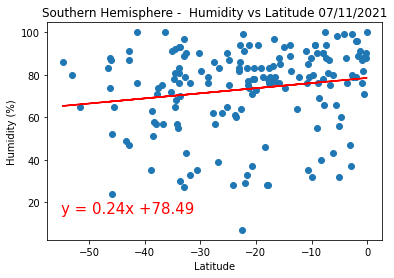

In [53]:
# Create Plot
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere -  Humidity vs Latitude " + data_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/South_Humidity_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [54]:
#plot: setting x_values, y_values 
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Cloudiness"]


In [55]:
# Performed a linear regression on Cloudiness vs. Latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      54.241944
3      57.429121
5      58.145408
7      52.671940
11     55.009680
         ...    
591    54.482680
592    59.488396
593    62.031078
594    56.083436
596    54.006543
Name: Latitude, Length: 426, dtype: float64


In [56]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.29x +69.09


The r-value is: 0.02297889066926201


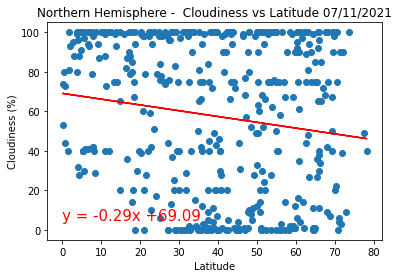

In [59]:
# Create Plot
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Cloudiness"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere -  Cloudiness vs Latitude " + data_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(0,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/North_Cloudiness_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [60]:
#plot: setting x_values, y_values 
x_values =southern_hem["Latitude"]
y_values =  southern_hem["Cloudiness"]


In [61]:
# Performed a linear regression on Cloudiness vs. Latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      47.071703
2      48.347042
4      47.621273
6      48.582398
8      46.653022
         ...    
583    47.959133
585    48.645219
586    49.264636
590    47.560594
595    49.470243
Name: Latitude, Length: 171, dtype: float64


In [62]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.06x +50.05


The r-value is: 0.0005633889625025095


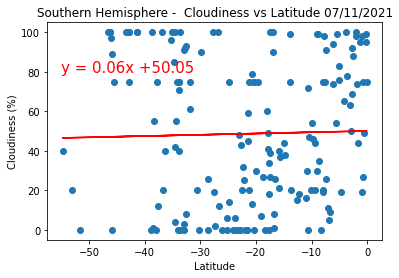

In [66]:
# Create Plot
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Cloudiness"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere -  Cloudiness vs Latitude " + data_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/South_Cloudiness_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [83]:
#plot: setting x_values, y_values 
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Wind Speed"]


In [84]:
# Performed a linear regression on Wind Speed vs. Latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      7.153494
3      7.141601
5      7.138928
7      7.159353
11     7.150629
         ...   
591    7.152596
592    7.133916
593    7.124428
594    7.146622
596    7.154373
Name: Latitude, Length: 426, dtype: float64


In [85]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.0x +7.1


The r-value is: 1.8465049300039762e-05


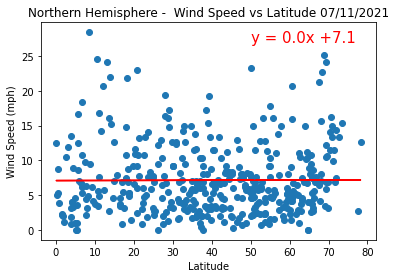

In [86]:
# Create Plot
x_values = northern_hem["Latitude"]
y_values =  northern_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere -  Wind Speed vs Latitude " + data_date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(50,27),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/North_Wind_Speed_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [75]:
#plot: setting x_values, y_values 
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Wind Speed"]


In [76]:
# Performed a linear regression on Wind Speed vs. Latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      11.738374
2       8.808631
4      10.475885
6       8.267965
8      12.700178
         ...    
583     9.699746
585     8.123650
586     6.700709
590    10.615280
595     6.228383
Name: Latitude, Length: 171, dtype: float64


In [77]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.15x +4.9


The r-value is: 0.09388787913139099


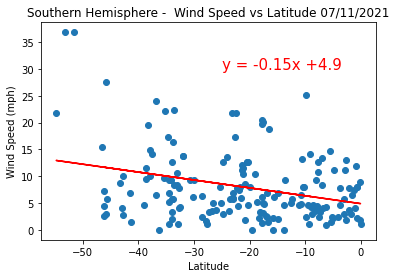

In [81]:
# Create Plot
x_values = southern_hem["Latitude"]
y_values =  southern_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere -  Wind Speed vs Latitude " + data_date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Images/South_Wind_Speed_vs_Lat.png")

# Show plot
plt.show()